<a href="https://colab.research.google.com/github/Sushmitha-712/bmi-app/blob/main/TwoWaySplitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression


In [6]:
from google.colab import files
uploaded = files.upload()   # choose diabetes.csv from your computer

import io
import pandas as pd

# read the uploaded CSV
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
print("Dataset loaded successfully!")
df.head()


Saving diabetes.csv to diabetes.csv
Dataset loaded successfully!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Describe dataset
df.describe()


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Display feature names
print("Features:", list(X.columns))
print("Target:", y.name)


Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target: Outcome


In [9]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 614
Testing samples: 154


In [10]:
# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


In [12]:
# Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(acc, 3))
print("Precision:", round(prec, 3))
print("Recall:", round(rec, 3))
print("F1 Score:", round(f1, 3))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.714
Precision: 0.609
Recall: 0.519
F1 Score: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



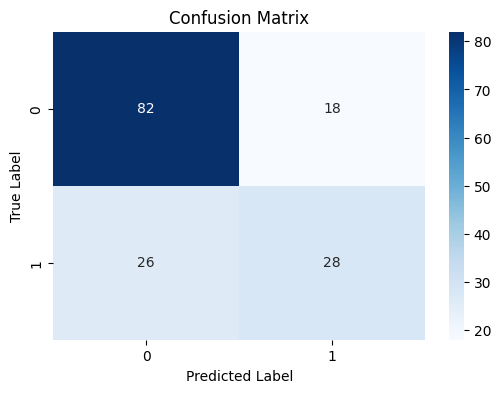

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


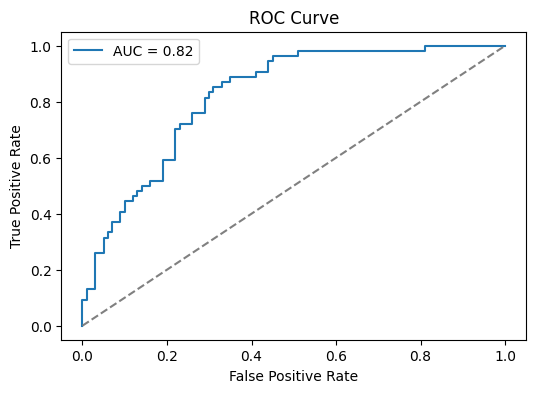

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


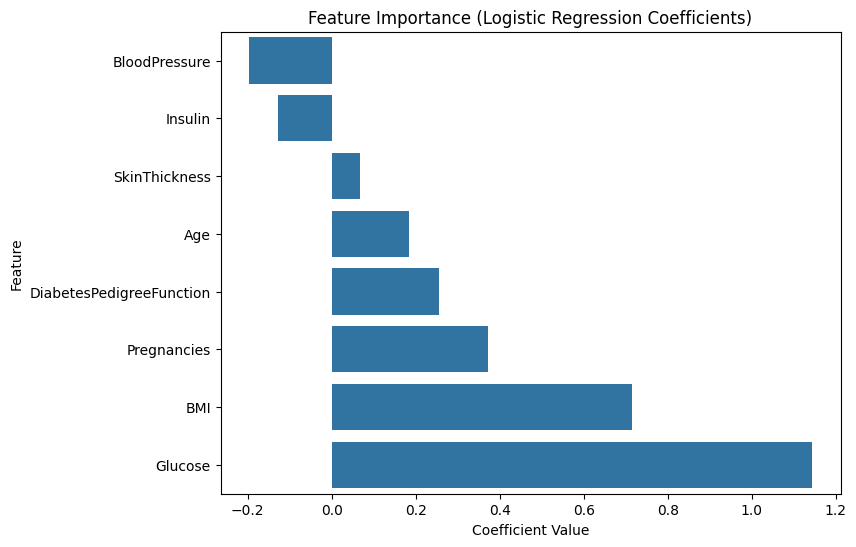

In [15]:
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


In [16]:
# Split the dataset into Training (80%) and Testing (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Two-Way Split Completed\n")
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape :", X_test.shape)
print("Training Labels Shape  :", y_train.shape)
print("Testing Labels Shape   :", y_test.shape)

# show sample rows from each set
print("\n--- Training Data Sample ---")
display(pd.concat([X_train.head(3), y_train.head(3)], axis=1))

print("\n--- Testing Data Sample ---")
display(pd.concat([X_test.head(3), y_test.head(3)], axis=1))

# also show class distribution
print("\n--- Class Distribution ---")
print("Train Set:\n", y_train.value_counts(normalize=True).round(2))
print("\nTest Set:\n", y_test.value_counts(normalize=True).round(2))


✅ Two-Way Split Completed

Training Features Shape: (614, 8)
Testing Features Shape : (154, 8)
Training Labels Shape  : (614,)
Testing Labels Shape   : (154,)

--- Training Data Sample ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
353,1,90,62,12,43,27.2,0.580,24,0
711,5,126,78,27,22,29.6,0.439,40,0
373,2,105,58,40,94,34.9,0.225,25,0



--- Testing Data Sample ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
44,7,159,64,0,0,27.4,0.294,40,0
672,10,68,106,23,49,35.5,0.285,47,0
700,2,122,76,27,200,35.9,0.483,26,0



--- Class Distribution ---
Train Set:
 Outcome
0    0.65
1    0.35
Name: proportion, dtype: float64

Test Set:
 Outcome
0    0.65
1    0.35
Name: proportion, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Add a readable label column to show Yes/No
y_train_label = y_train.map({1: "Yes (Diabetic)", 0: "No (Healthy)"})
y_test_label = y_test.map({1: "Yes (Diabetic)", 0: "No (Healthy)"})

print("✅ Two-Way Split Completed\n")
print("Training samples:", X_train.shape[0])
print("Testing samples :", X_test.shape[0])

# Show few samples with Yes/No labels
train_preview = pd.concat([X_train.head(5).reset_index(drop=True), y_train_label.head(5).reset_index(drop=True)], axis=1)
test_preview = pd.concat([X_test.head(5).reset_index(drop=True), y_test_label.head(5).reset_index(drop=True)], axis=1)

print("\n--- Training Data Sample (Outcome as Yes/No) ---")
display(train_preview)

print("\n--- Testing Data Sample (Outcome as Yes/No) ---")
display(test_preview)


✅ Two-Way Split Completed

Training samples: 614
Testing samples : 154

--- Training Data Sample (Outcome as Yes/No) ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,90,62,12,43,27.2,0.580,24,No (Healthy)
1,5,126,78,27,22,29.6,0.439,40,No (Healthy)
2,2,105,58,40,94,34.9,0.225,25,No (Healthy)
3,1,146,56,0,0,29.7,0.564,29,No (Healthy)
4,0,95,64,39,105,44.6,0.366,22,No (Healthy)



--- Testing Data Sample (Outcome as Yes/No) ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,159,64,0,0,27.4,0.294,40,No (Healthy)
1,10,68,106,23,49,35.5,0.285,47,No (Healthy)
2,2,122,76,27,200,35.9,0.483,26,No (Healthy)
3,7,114,64,0,0,27.4,0.732,34,Yes (Diabetic)
4,2,74,0,0,0,0.0,0.102,22,No (Healthy)
